**Attrition Analytics - Exploratory Analysis & Predictive Modeling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
## Read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/pratiksha798/CSV-files/refs/heads/main/greendestination%20(1).csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
##looking for any missing values

df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
## Exploratory Data Analysis

In [9]:
## basic descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#Mapping the attrition 1 - yes and 0 - no in the new column

df["left"] = np.where(df["Attrition"] == "Yes",1,0)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [12]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)

    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)

    plt.show()

In [14]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):

    """A function for Plotting the effect of variables(categorical data) on attrition """

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])

    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")

    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)

    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

In [15]:
## Analyizing the variables
# Numerical Variables

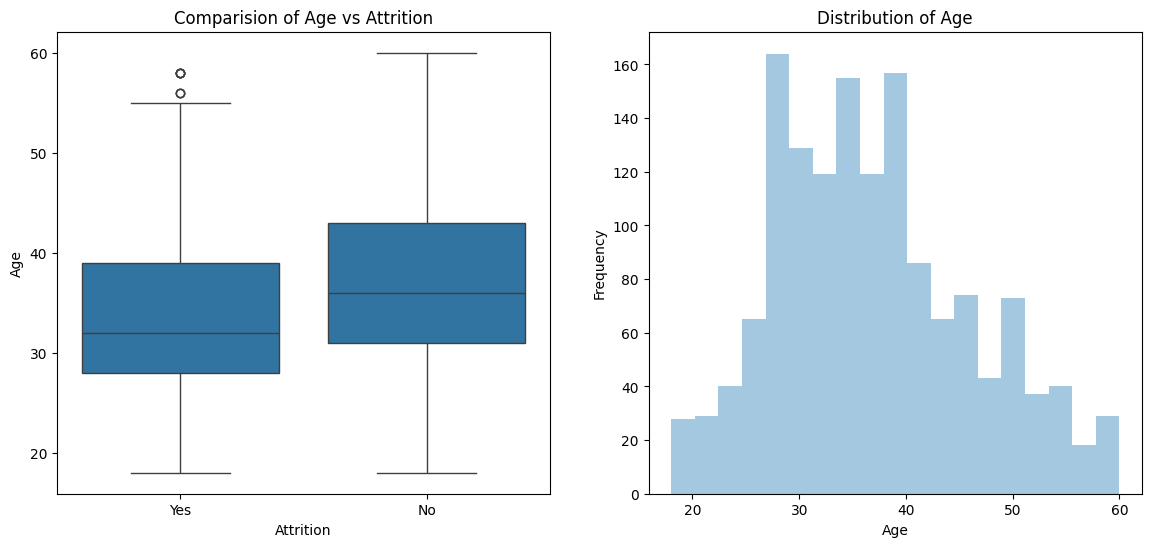

In [16]:
# Age
# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(df,segment_by="Age")

In [17]:
## We found that median age of employee's in the company is 30 - 40 Yrs.
## Minimum age is 18 Yrs and Maximum age is 60 Yrs.
## From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't left the company are of age 32 to 40 years

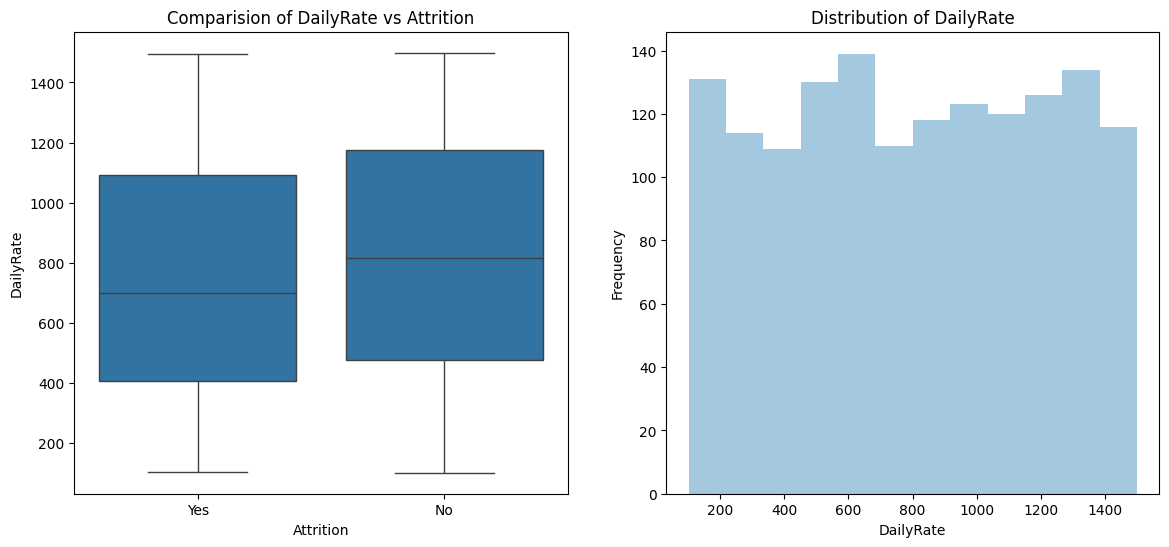

In [18]:
# Daily Rate & Montly Income & HourlyRate
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(df,"DailyRate")

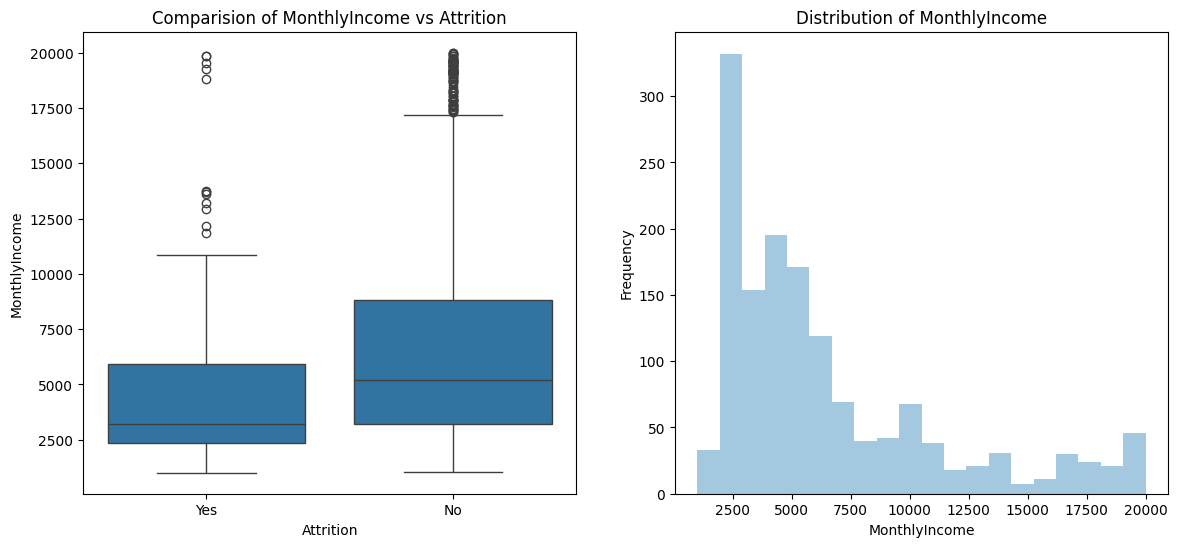

In [20]:
NumericalVariables_targetPlots(df,"MonthlyIncome")

In [21]:
# Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates. The same trend is resonated with monthly income too.

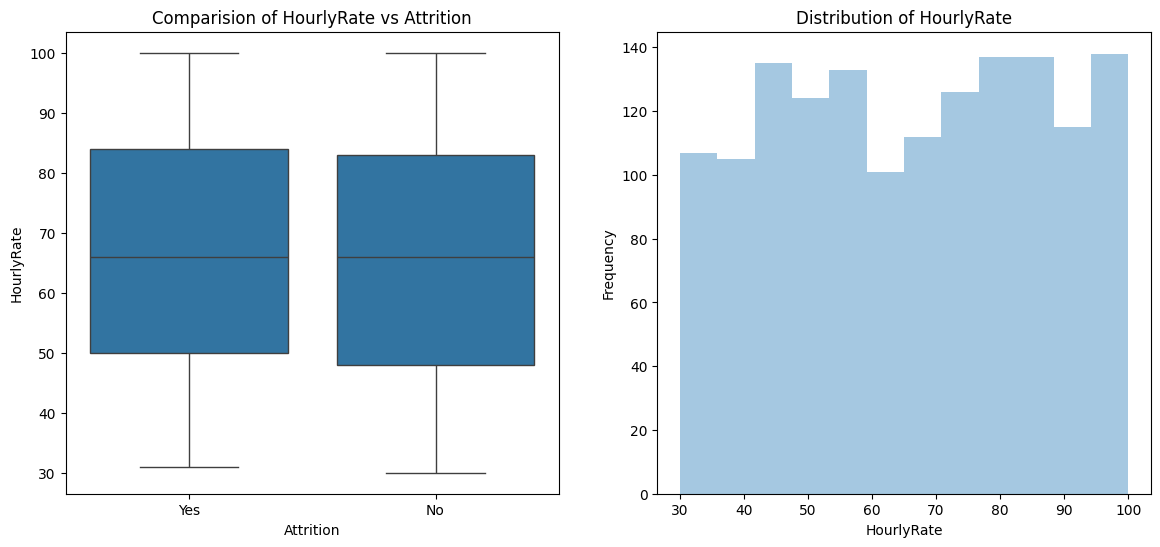

In [22]:
# Hourly Rate

NumericalVariables_targetPlots(df,"HourlyRate")

In [23]:
#From plot we have seen that there is no significant difference in the hourly rate and attrition. Therefore hourly rate is considered as not signifcant to attrition

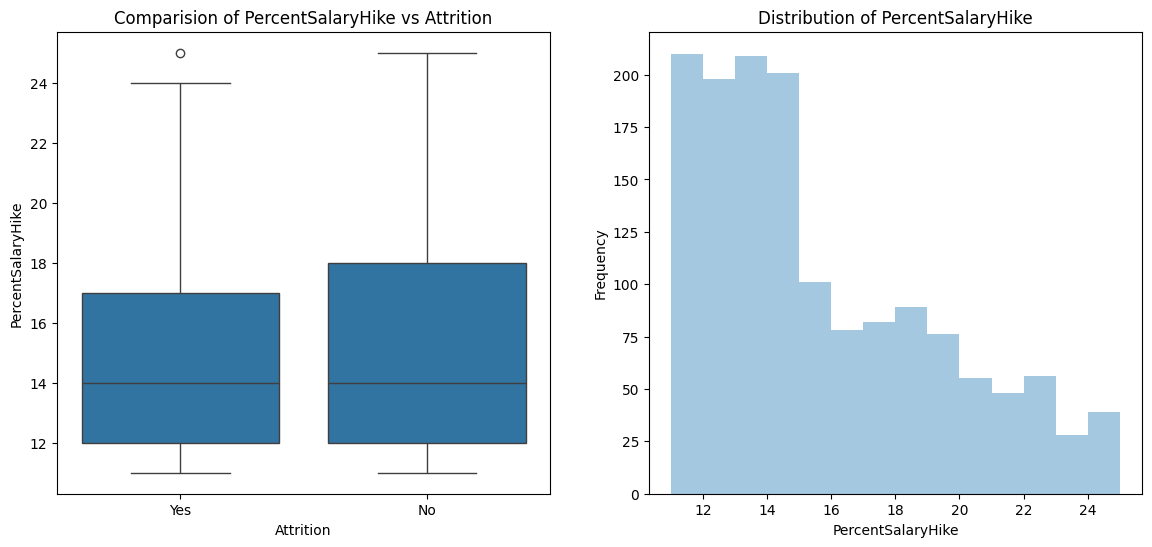

In [25]:
# PercentSalaryHike
NumericalVariables_targetPlots(df,"PercentSalaryHike")

In [26]:
# Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

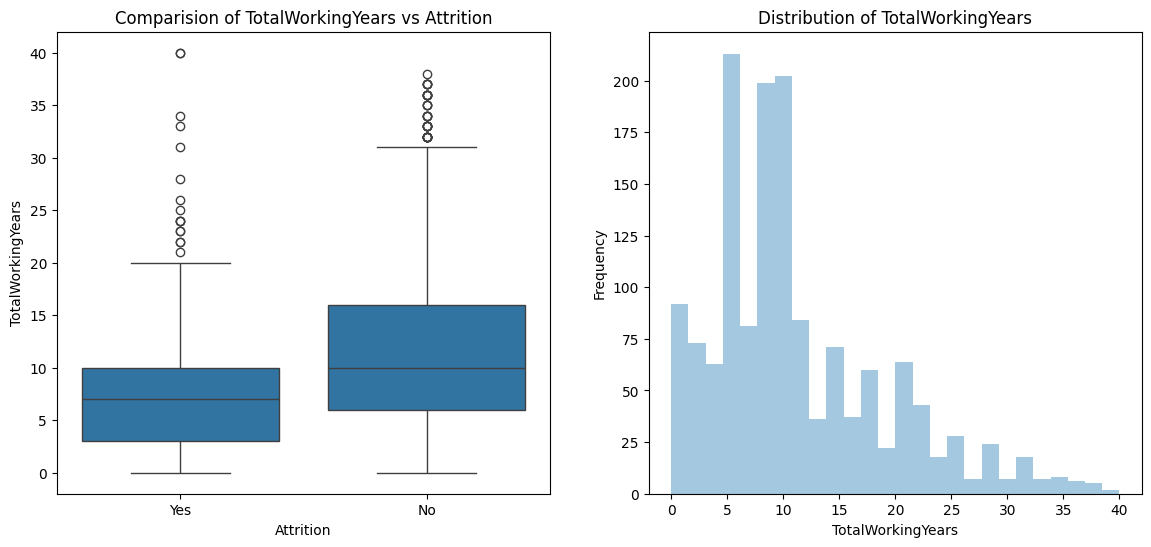

In [27]:
# Total Working years
NumericalVariables_targetPlots(df,"TotalWorkingYears")

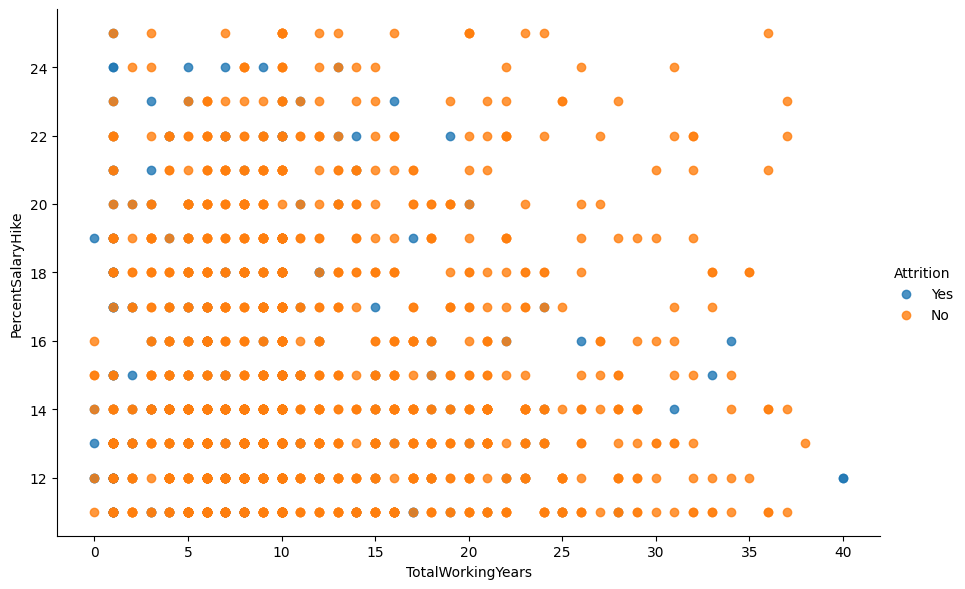

In [31]:
sns.lmplot(x="TotalWorkingYears", y="PercentSalaryHike", data=df, fit_reg=False, hue="Attrition", height=6, aspect=1.5)

plt.show()

In [30]:
# Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike.
# Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.
# Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike

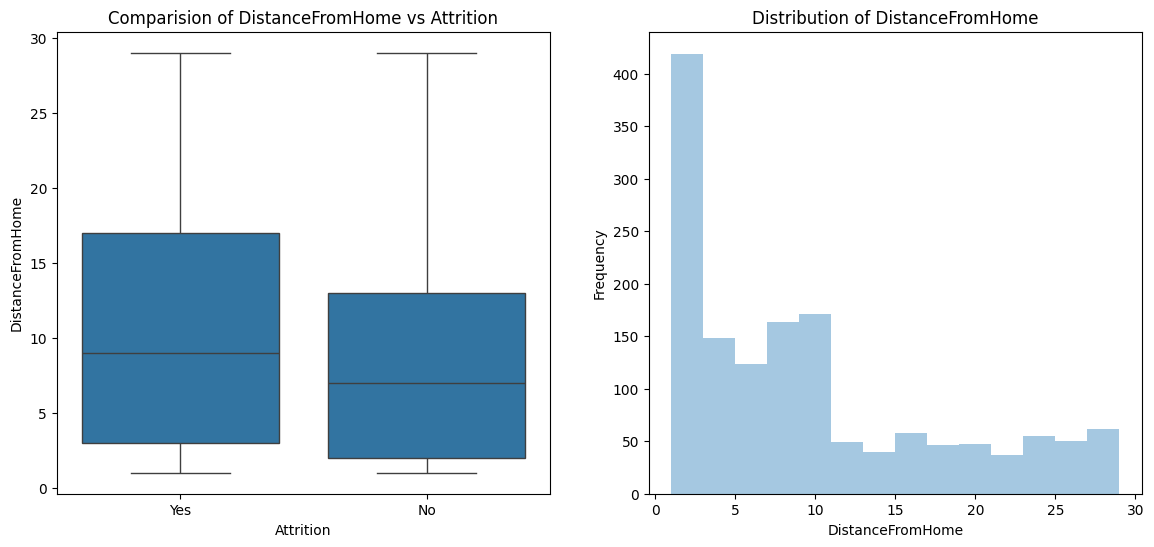

In [32]:
# Distance From Home
NumericalVariables_targetPlots(df,"DistanceFromHome")

In [33]:
# There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases

In [34]:
## Analyizing the variables
# Categorical Variables
# Job Involvement

#cross tabulation between attrition and JobInvolvement
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [35]:
#calculating the percentage of people having different job involvement rate
round(df.JobInvolvement.value_counts()/df.shape[0] * 100,2)

,count
JobInvolvement,
3,59.05
2,25.51
4,9.80
1,5.65


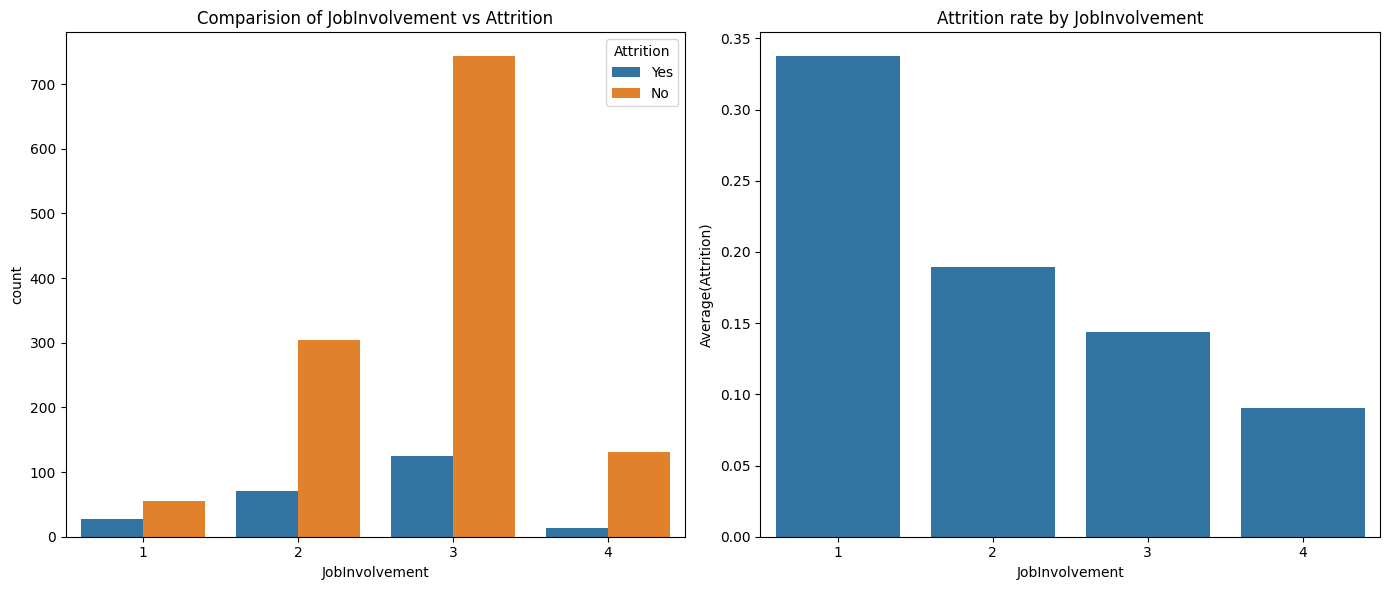

In [36]:
CategoricalVariables_targetPlots(df,"JobInvolvement")

In [37]:
# In the total data set, 59% have high job involvement whereas 25% have medium involvement rate
# From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.
# Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company

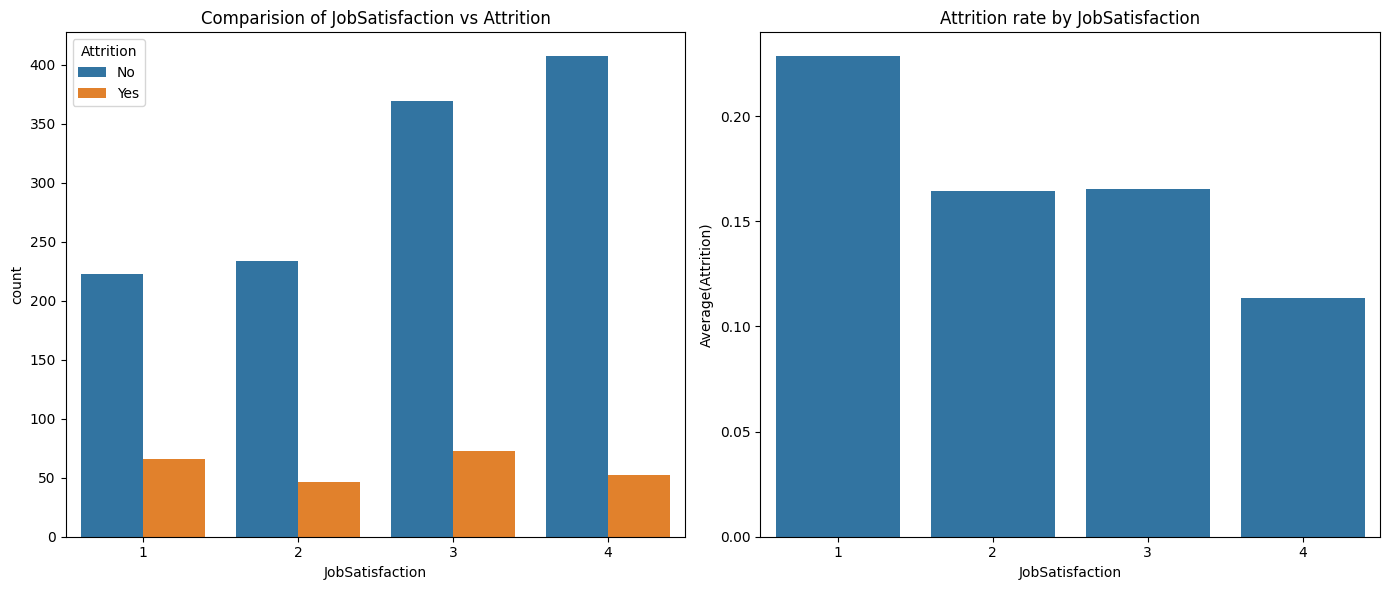

In [38]:
# JobSatisfaction
CategoricalVariables_targetPlots(df,"JobSatisfaction")

In [39]:
## As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

In [40]:
## Performance Rating
#checking the number of categories under performance rating
df.PerformanceRating.value_counts()

,count
PerformanceRating,
3,1244
4,226


In [41]:
#calculate the percentage of performance rating per category in the whole dataset
round(df.PerformanceRating.value_counts()/df.shape[0] * 100,2)

,count
PerformanceRating,
3,84.63
4,15.37


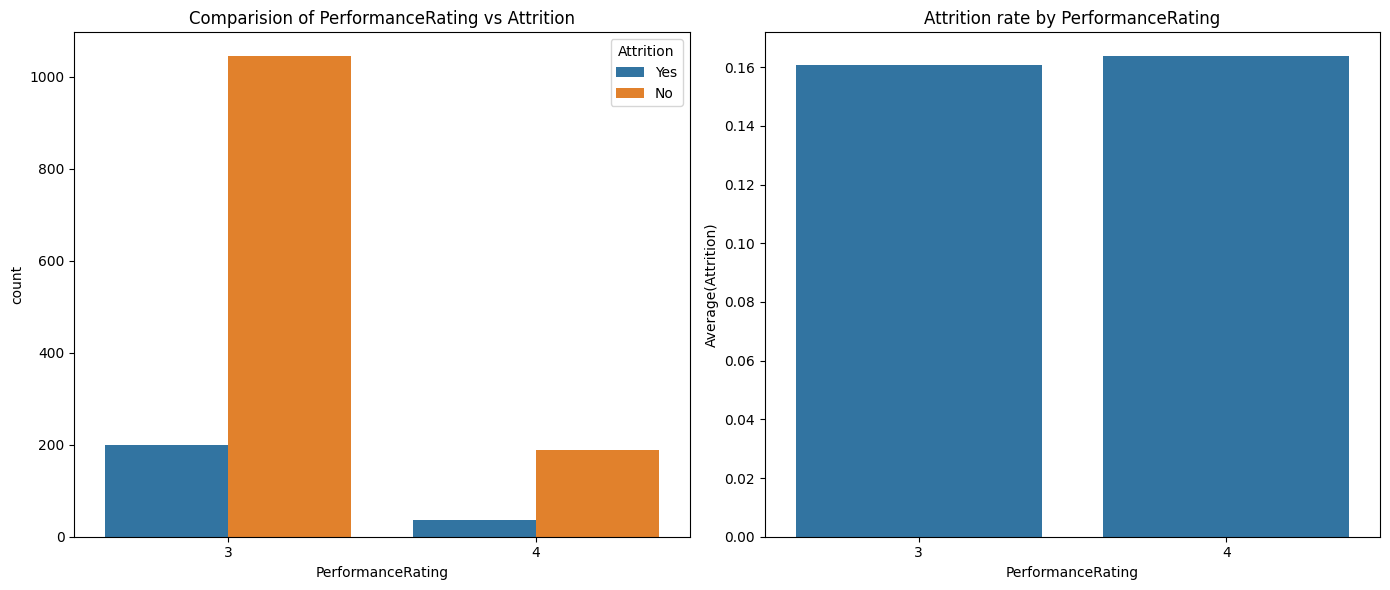

In [42]:
CategoricalVariables_targetPlots(df,"PerformanceRating")

In [43]:
# RelationshipSatisfaction
#percentage of each relationship satisfaction category across the data
round(df.RelationshipSatisfaction.value_counts()/df.shape[0],2)

,count
RelationshipSatisfaction,
3,0.31
4,0.29
2,0.21
1,0.19


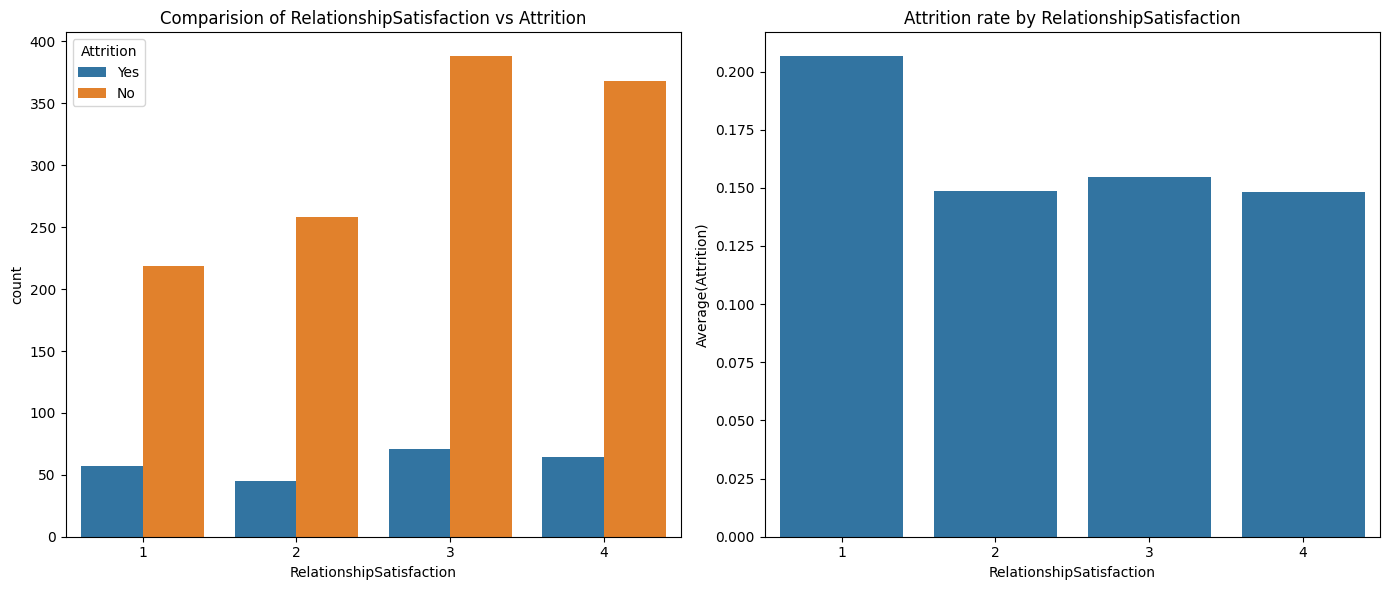

In [44]:
CategoricalVariables_targetPlots(df,"RelationshipSatisfaction")

In [45]:
## WorkLifeBalance
#percentage of worklife balance rating across the company data
round(df.WorkLifeBalance.value_counts()/df.shape[0],2)

,count
WorkLifeBalance,
3,0.61
2,0.23
4,0.10
1,0.05


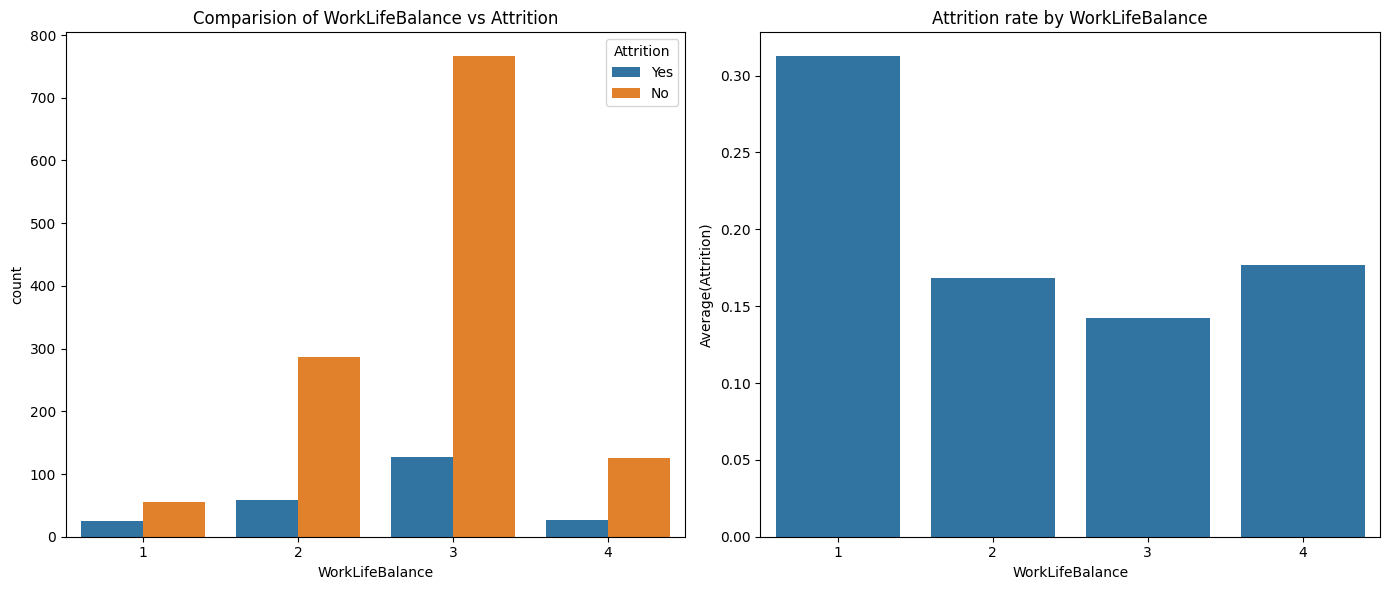

In [46]:
CategoricalVariables_targetPlots(df,"WorkLifeBalance")

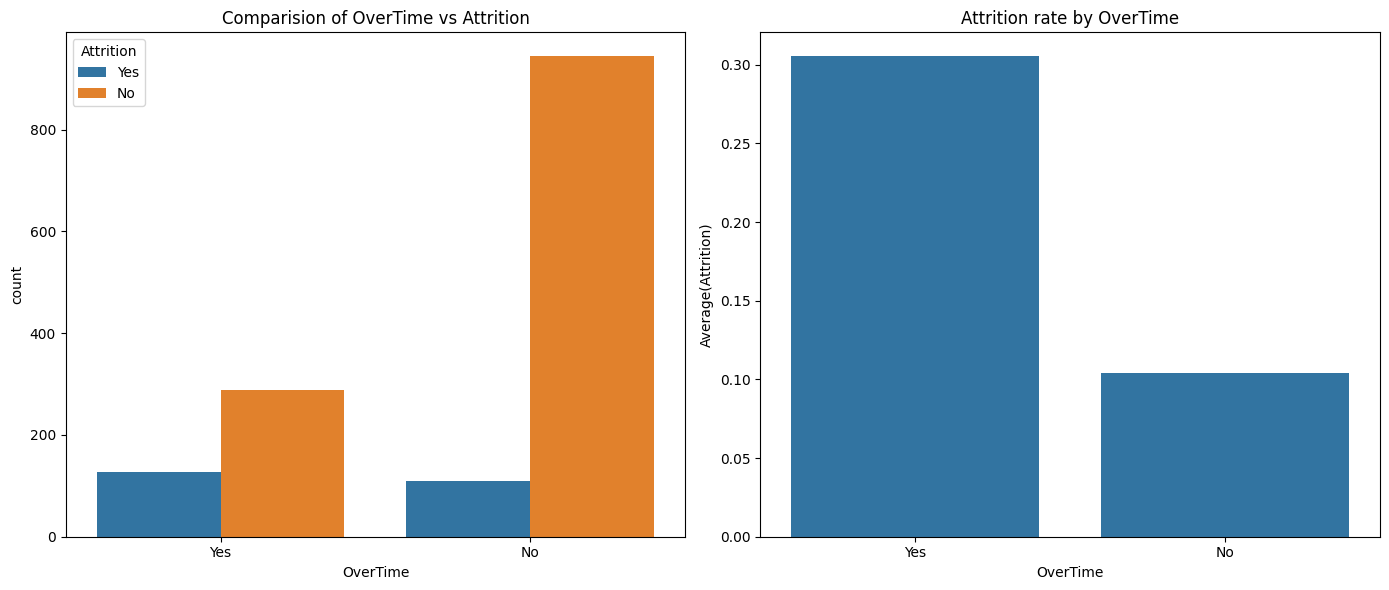

In [47]:
CategoricalVariables_targetPlots(df,"OverTime")

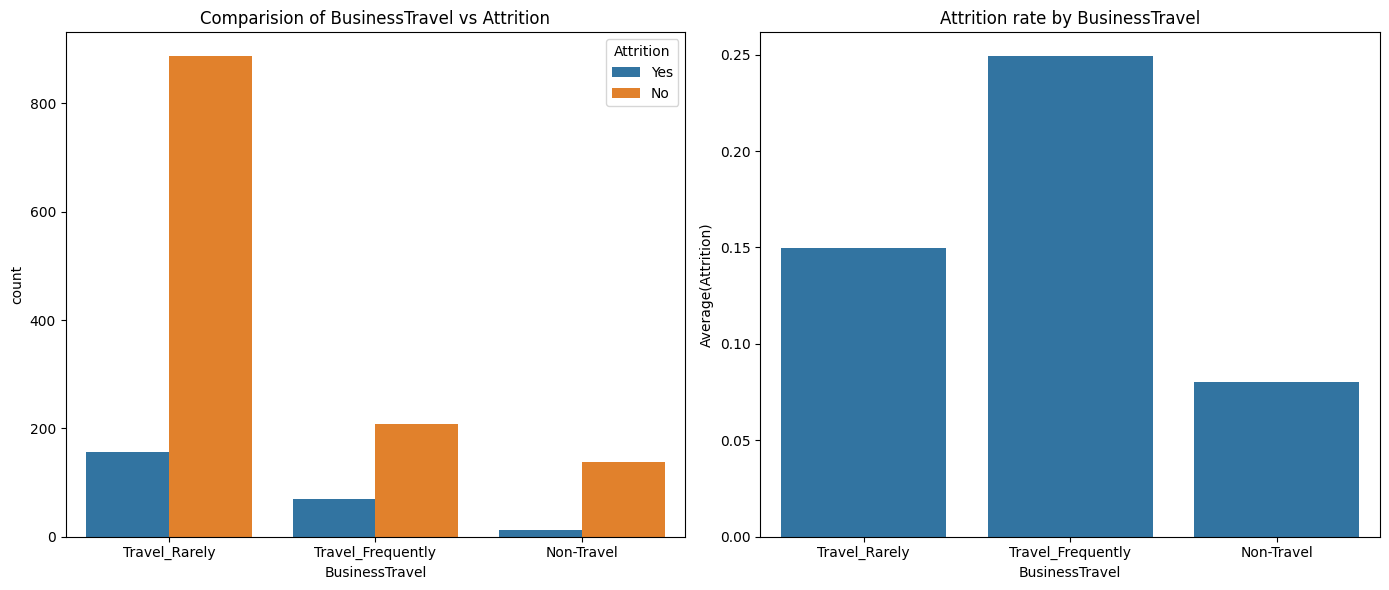

In [48]:
# BusinessTravel
CategoricalVariables_targetPlots(df,segment_by="BusinessTravel")

In [49]:
# Department
df.Department.value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


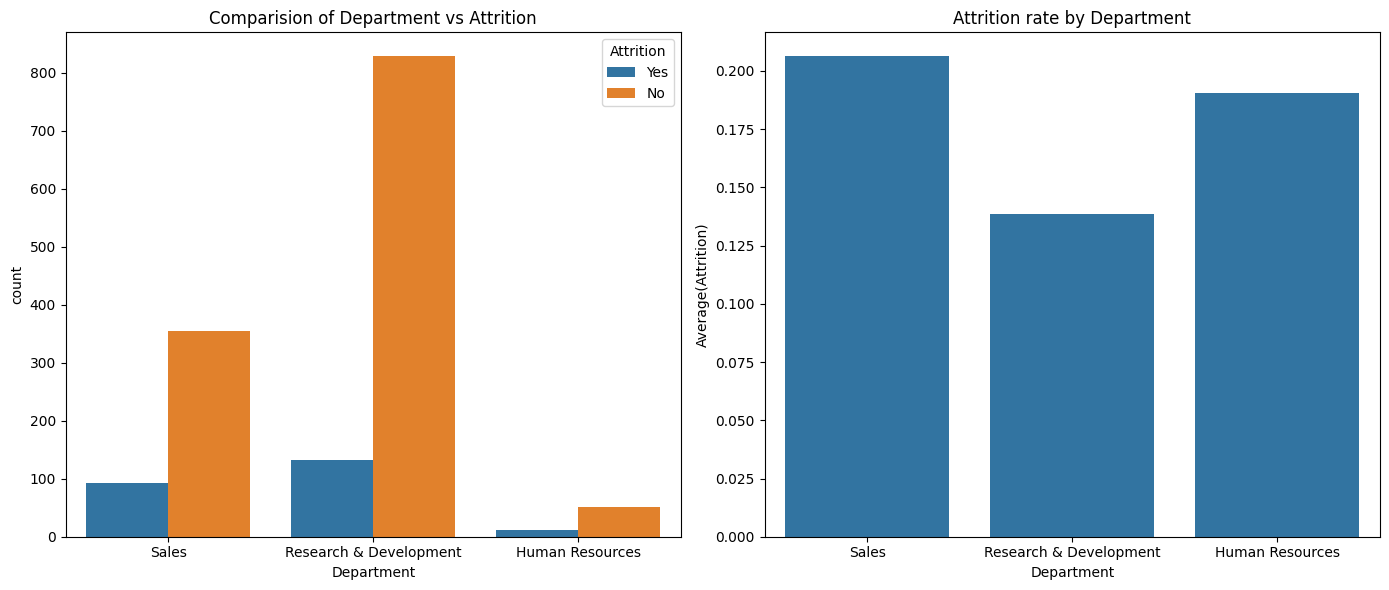

In [50]:
CategoricalVariables_targetPlots(df,segment_by="Department")

In [51]:
# EducationField
df.EducationField.value_counts()

,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


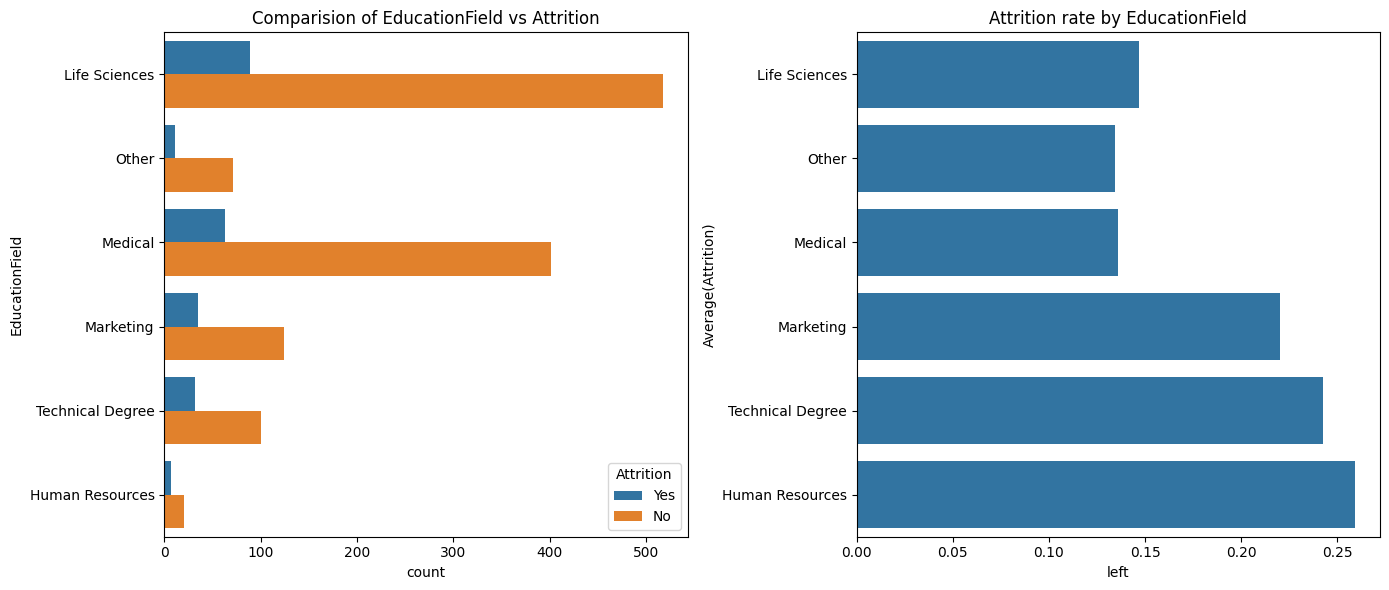

In [52]:
CategoricalVariables_targetPlots(df,"EducationField",invert_axis=True)

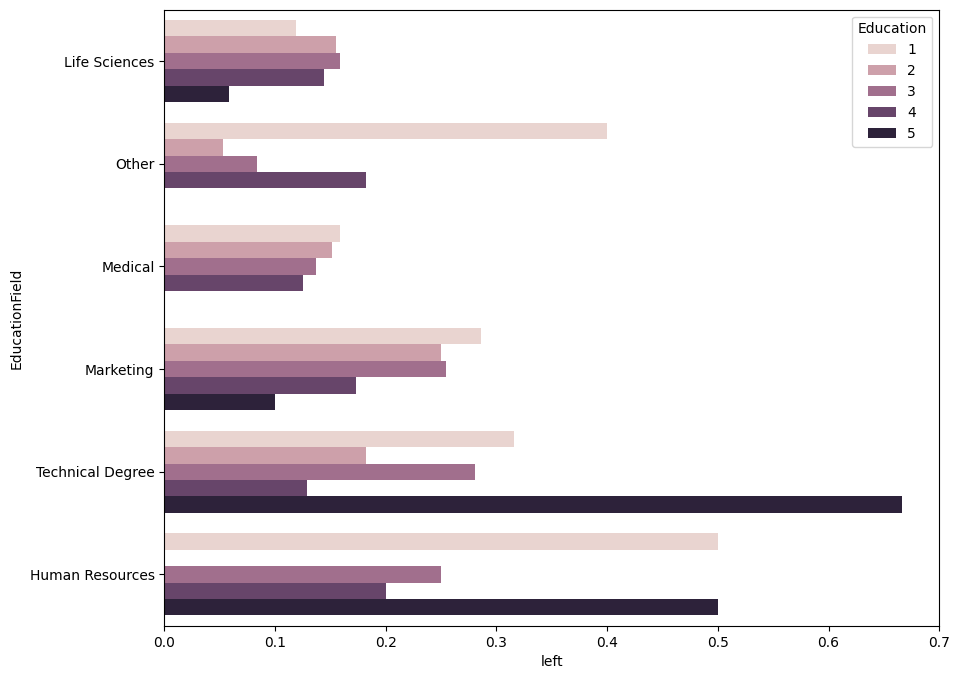

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=df,ci=None)
plt.show()

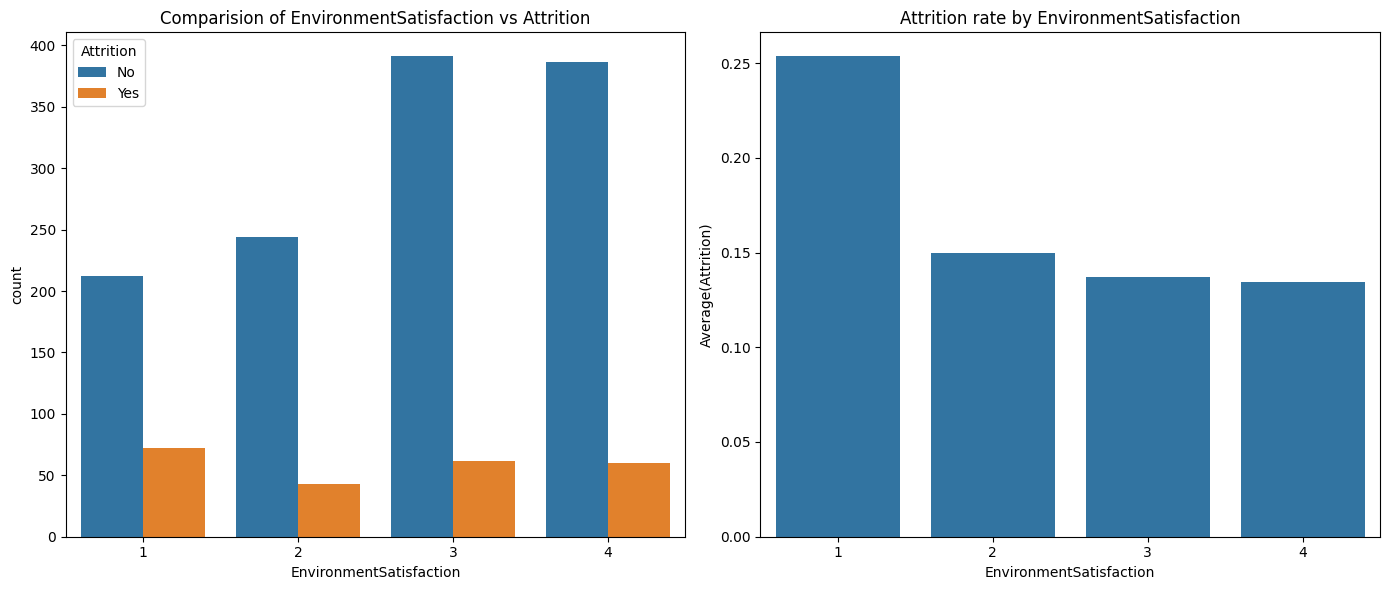

In [54]:
# EnvironmentSatisfaction
CategoricalVariables_targetPlots(df,"EnvironmentSatisfaction")

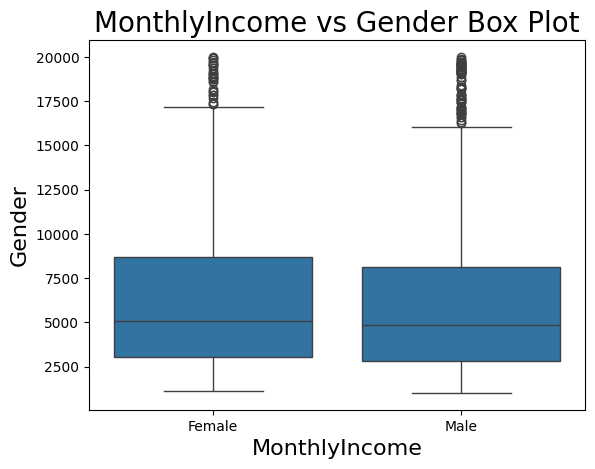

In [56]:
# Gender Vs Attrition
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)  # Corrected line
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

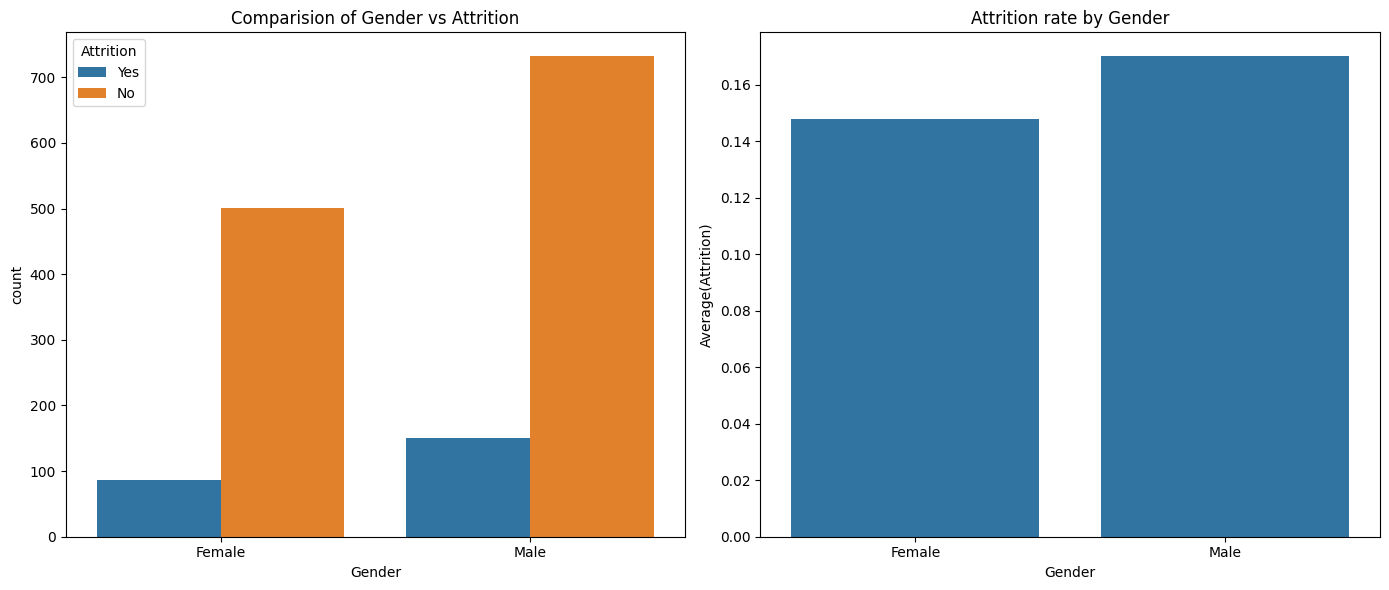

In [57]:
CategoricalVariables_targetPlots(df,"Gender")

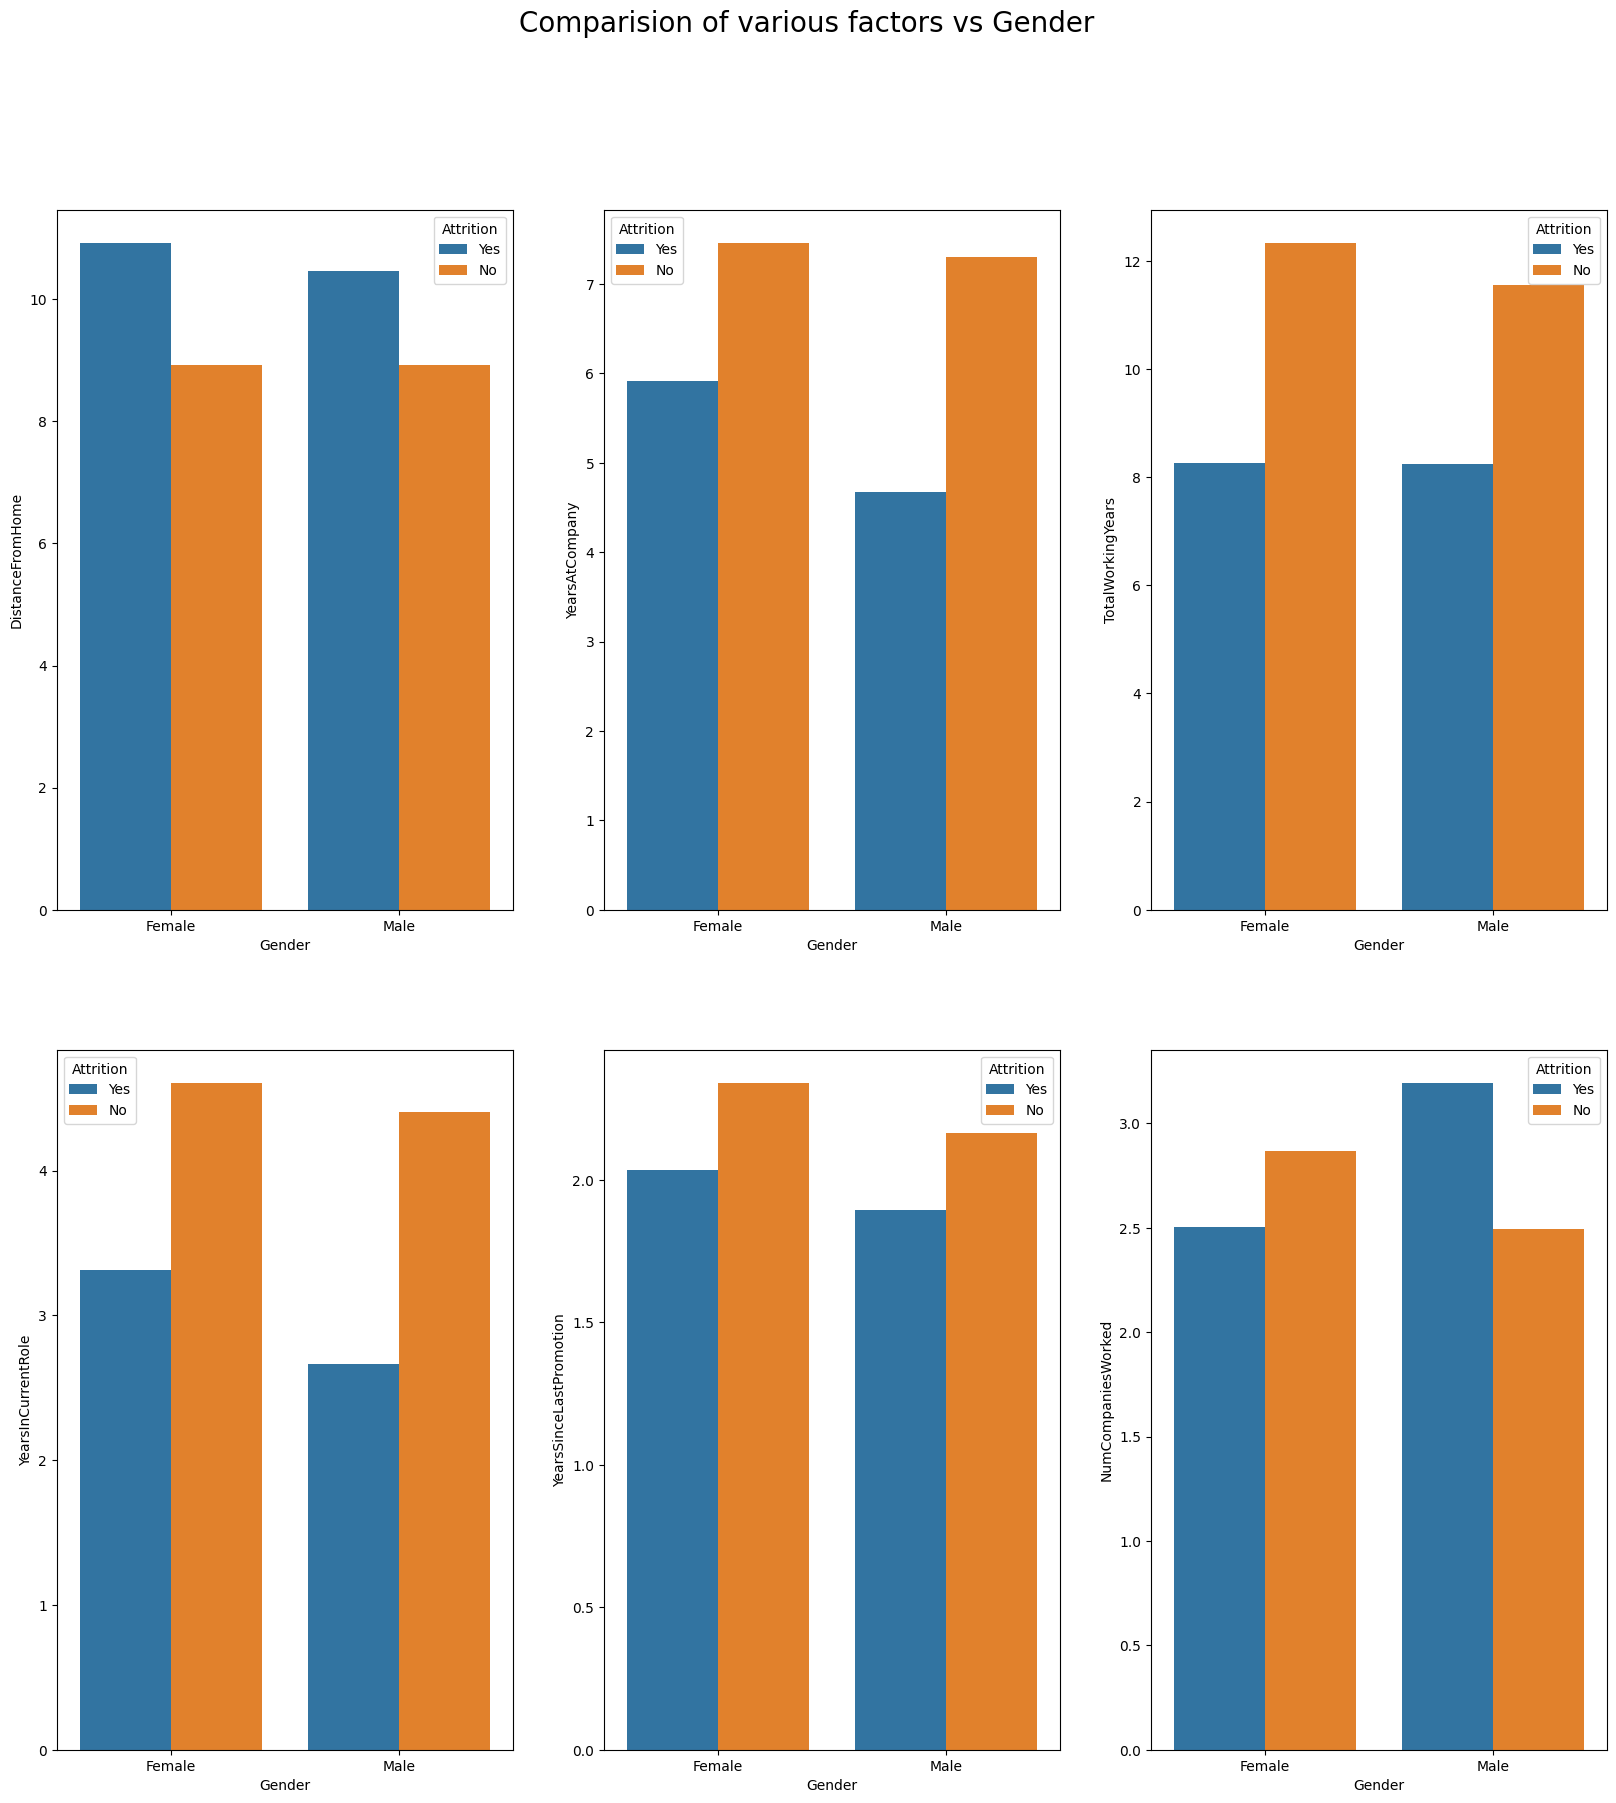

In [59]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(x=df['Gender'],y=df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None);  # Corrected line: Pass x and y as keyword arguments
sns.barplot(x=df['Gender'],y=df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None);  # Corrected line: Pass x and y as keyword arguments
sns.barplot(x=df['Gender'],y=df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None);  # Corrected line: Pass x and y as keyword arguments
sns.barplot(x=df['Gender'],y=df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None);  # Corrected line: Pass x and y as keyword arguments
sns.barplot(x=df['Gender'],y=df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None);  # Corrected line: Pass x and y as keyword arguments
sns.barplot(x=df['Gender'],y=df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None);  # Corrected line: Pass x and y as keyword arguments
plt.show()

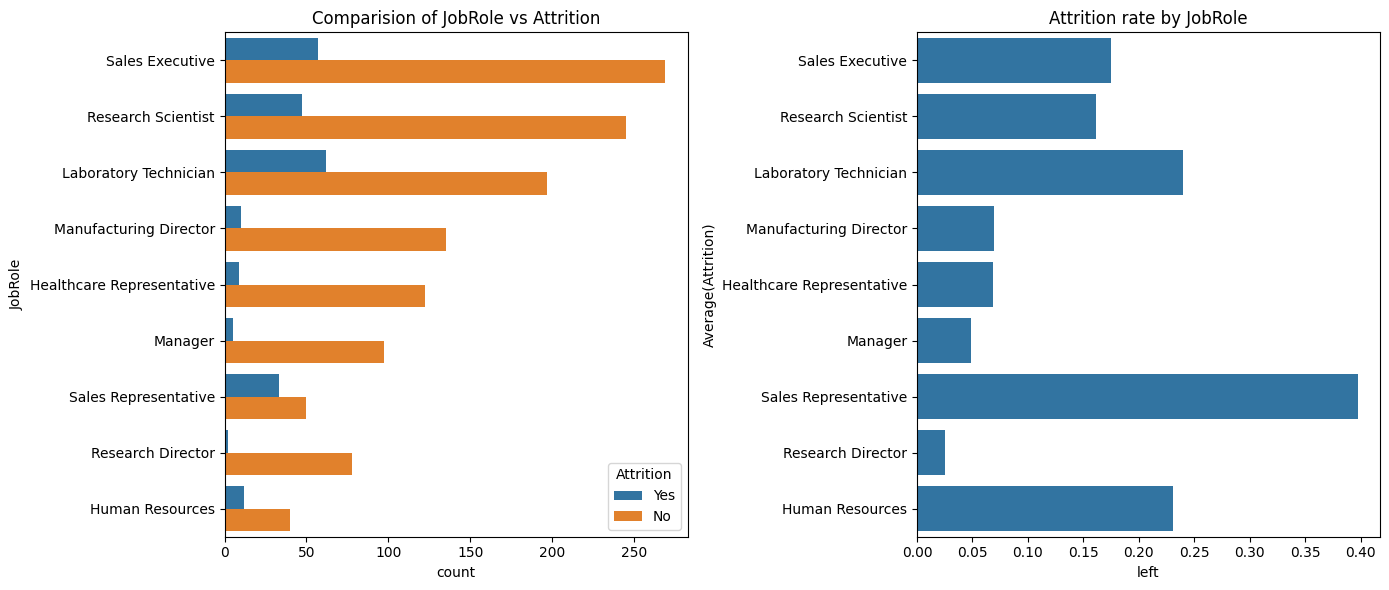

In [60]:
# Job Role
CategoricalVariables_targetPlots(df,"JobRole",invert_axis=True)

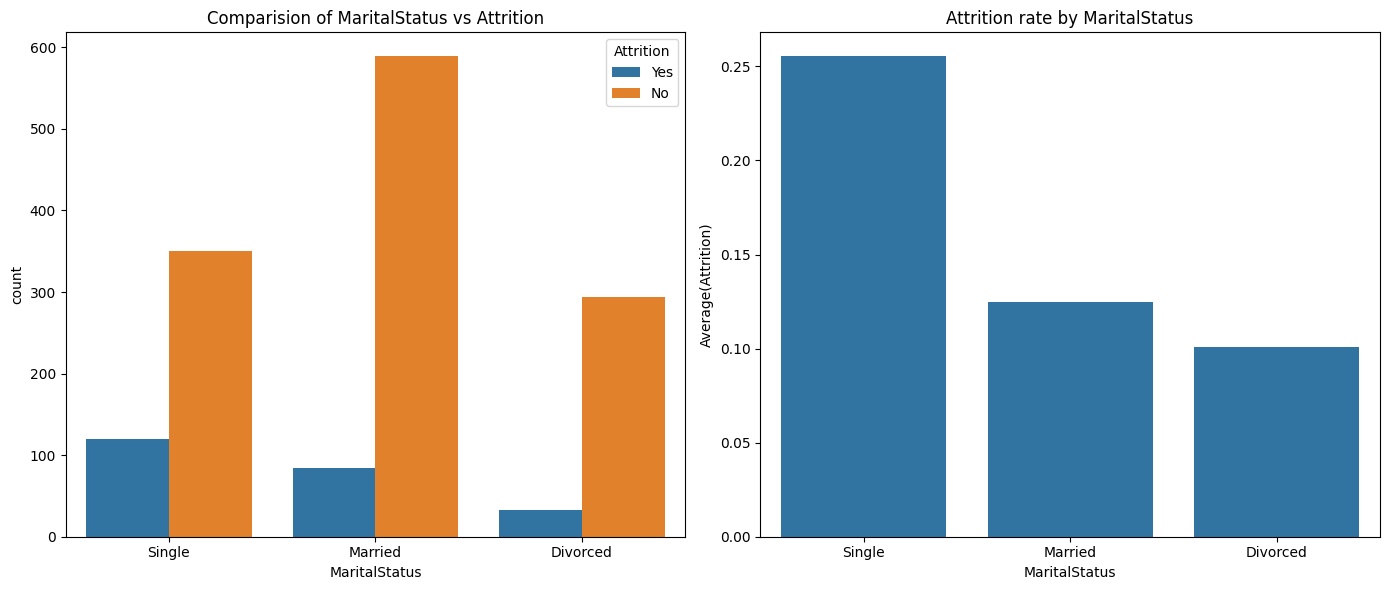

In [61]:
# Marital Status
CategoricalVariables_targetPlots(df,"MaritalStatus")

In [62]:
# Building Model

In [63]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

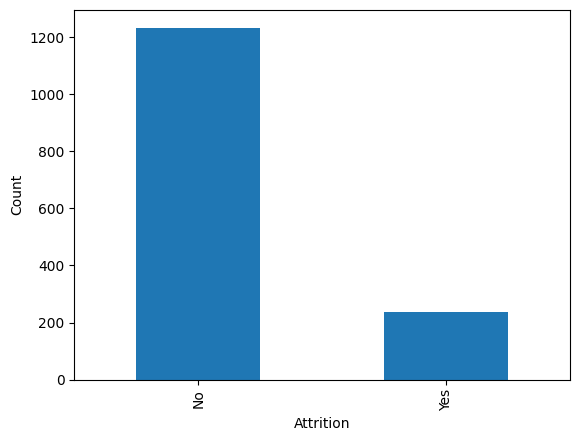

In [64]:
df.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [65]:
df["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


In [66]:
## From the Exploratory data analysis, variable that are not significant to attrition are:

# EmployeeCount, EmployeeNumber, Gender, HourlyRate, JobLevel, MaritalStatus, Over18, StandardHours

In [67]:
#copying the main employee data to another dataframe
df_new = df.copy()

In [68]:
#dropping the not significant variables
df_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

In [69]:
## Handling Categorical Variables
# Segregate the numerical and Categorical variables
# Convert Categorical variables to dummy variables

In [70]:
#data types of variables
dict(df_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [71]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(df_new.dtypes) if dict(df_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(df_new.dtypes) if dict(df_new.dtypes)[key] in ["object"]]

In [72]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [73]:
#store the numerical variables data in seperate dataset

df_num = df_new[numeric_variable_names]
#store the categorical variables data in seperate dataset

df_cat = df_new[categorical_variable_names]
#dropping the attrition
df_cat.drop(["Attrition"],axis=1,inplace=True)
#converting into dummy variables

df_cat = pd.get_dummies(df_cat)
#Merging the both numerical and categorical data
df_final = pd.concat([df_num, df_cat,df_new[["Attrition"]]],axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,False,False,True,False,False,False,True,False,True,Yes
1,49,279,8,1,3,2,2,2,5130,24907,...,False,True,False,False,False,True,False,True,False,No
2,37,1373,2,2,4,2,1,3,2090,2396,...,False,False,False,False,False,False,True,False,True,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,...,False,True,False,False,False,True,False,False,True,No
4,27,591,2,1,1,3,1,2,3468,16632,...,False,False,False,False,False,True,False,True,False,No


In [74]:
#final features
features =  list(df_final.columns.difference(["Attrition"]))

In [75]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PerformanceRating',

In [76]:
#seperating the target and predictors

X = df_final[features]
y = df_final[["Attrition"]]

In [77]:
X.shape

(1470, 48)

In [78]:
## Train-Test Split(Stratified Sampling of Y)

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best
from sklearn.model_selection import GridSearchCV

In [79]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [80]:
#Checks Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

,count
Attrition,
No,0.838678
Yes,0.161322


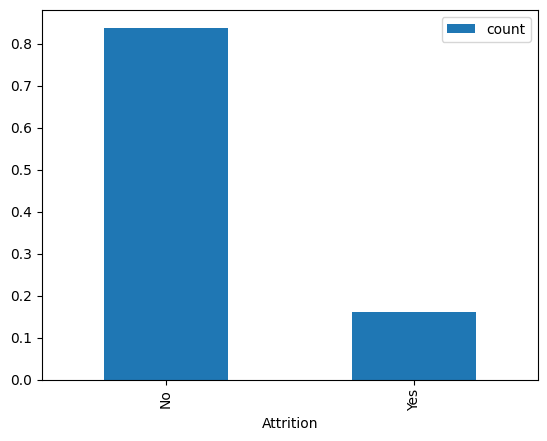

In [81]:
#Checks Proportion in training data
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [82]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

,count
Attrition,
No,0.839002
Yes,0.160998


In [83]:
#make a pipeline for decision tree model

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [84]:
## Cross Validate
# To check the accuracy of the pipeline
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)
scores['test_score'].mean()

0.8396590101823348

In [85]:
# Average accuracy of pipeline with Decision Tree Classifier is 83.48%

# Cross-Validation and Hyper Parameters Tuning
# Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters

# Declare a hyper-parameters to fine tune the Decision Tree Classifier
# Decision Tree is a greedy alogritum it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree

In [86]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

In [92]:
## Decision Tree classifier with gini index
# Fit and tune models with cross-validation
# Now that we have our pipelines and hyperparameters dictionaries declared, we're ready to tune our models with cross-validation.

# We are doing 5 fold cross validation

In [93]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [94]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [95]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 7,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 10}

In [102]:
#Display the best score for the fitted model
clf_model.best_score_

0.8561780724603363

In [103]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=10,
                       random_state=100)

In [104]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

In [105]:
# Model Performance Evaluation On Test Data

In [106]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [107]:
tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [108]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [109]:
#merging the predicted data and its probability value

tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,0.632184
1432,No,No,0.220859
334,No,No,0.072165
1068,Yes,No,0.145985
736,No,No,0.072165


In [110]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)
tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,0.632184,1,1
1432,No,No,0.220859,0,0
334,No,No,0.072165,0,0
1068,Yes,No,0.145985,1,0
736,No,No,0.072165,0,0


In [111]:
## Confusion Matrix
# The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 21,  50],
       [ 26, 344]])

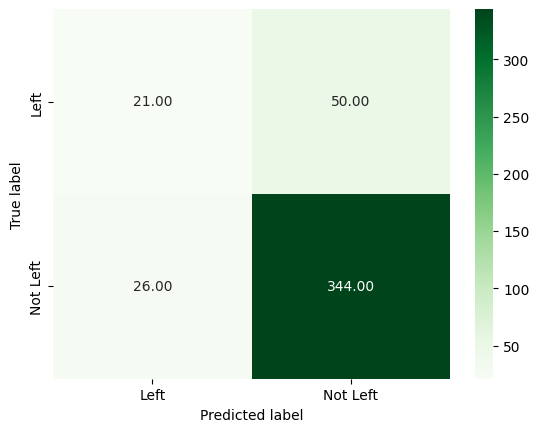

In [112]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [113]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.6128


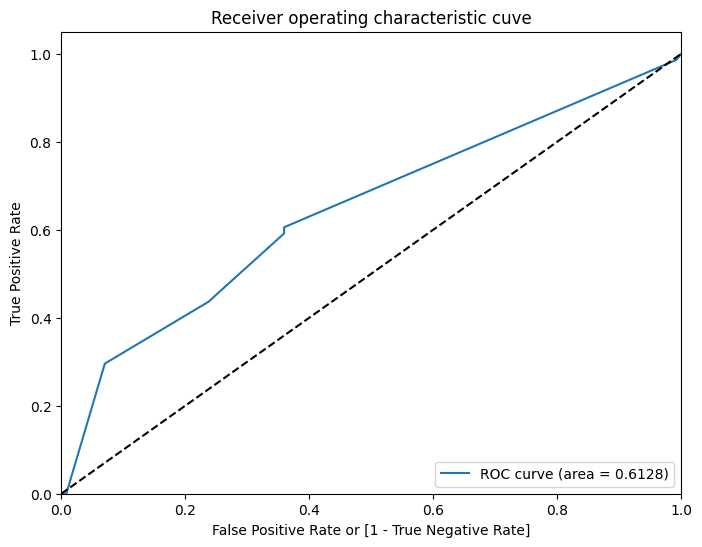

In [114]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

# From the ROC Curve, we have a choice to make depending on the value we place on true positive and tolerance for false positive rate

# If we wish to find the more people who are leaving, we could increase the true positive rate by adjusting the probability cutoff for classification. However by doing so would also increase the false positive rate. we need to find the optimum value of cutoff for classification Metrics
Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized
Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

In [115]:
#calculating the recall score

print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Recall Score: 29.577


In [116]:
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Precision Score: 44.681


In [117]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       370
           1       0.45      0.30      0.36        71

    accuracy                           0.83       441
   macro avg       0.66      0.61      0.63       441
weighted avg       0.80      0.83      0.81       441

